# Linear Regression（线性回归法）

## 一、线性回归算法介绍

#### 1、特点
#### （1）解决回归问题；
#### （2）思想简单，实现容易；
#### （3）许多强大的非线性模型的基础；
#### （4）结果具有很好的可解释性；
#### （5）蕴含机器学习中的很多重要思想；
#### （6）寻找一条直线，最大程度地拟合样本特征和样本输出标记之间的关系
####   
#### 2、一类机器学习算法的基本思路
#### （1）通过分析问题，确定问题的目标函数（损失函数【loss function】或效用函数【utility function】），通过最优化损失函数或者效用函数，获得机器学习模型
#### （2）近乎所有参数学习算法都是这样的思路（eg. 线性回归，多项式回归，逻辑回归，SVM，神经网络 ...）【最优化原理】
####  
#### 3、简单线性回归
#### （1）样本特征只有一个 [ y = ax + b ]
#### （2）简单线性回归的损失函数是典型的最小二乘法问题（最小化误差的平方）

## 二、实现 Simple Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

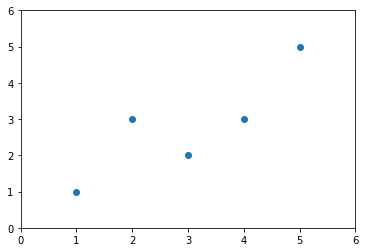

In [5]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

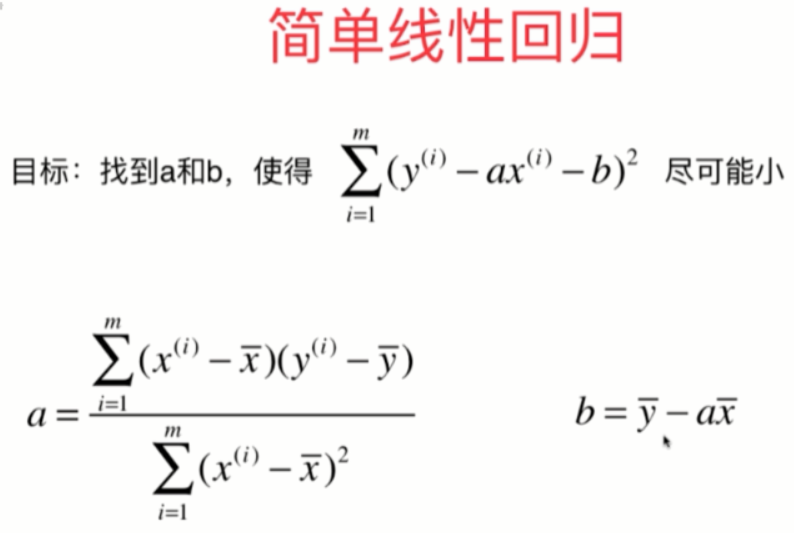

In [6]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [7]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [8]:
a = num / d
b = y_mean - a * x_mean

In [9]:
a

0.8

In [10]:
b

0.39999999999999947

In [11]:
y_hat = a * x + b

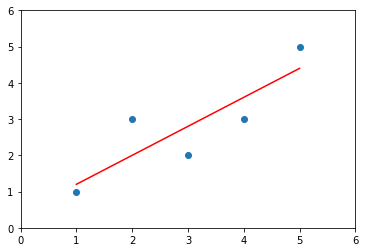

In [13]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

In [14]:
x_predict = 6
y_predict = a * x_predict + b

In [15]:
y_predict

5.2

### 使用自己的SimpleLinearRegression

In [17]:
%run D://资料//程序//Python//Machine_Learn//LinearRegression//simple_linear_regression.py

In [19]:
reg = SimpleLinearRegression()
reg.fit(x, y)

SimpleLinearRegression()

In [20]:
reg.predict(np.array([x_predict]))

array([5.2])

In [21]:
reg.a_

0.8

In [22]:
reg.b_

0.39999999999999947

In [23]:
y_hat_reg = reg.predict(x)

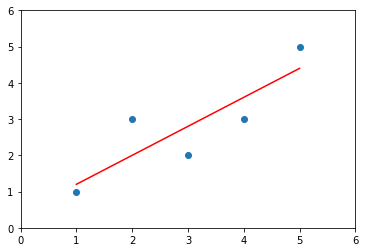

In [24]:
plt.scatter(x, y)
plt.plot(x, y_hat_reg, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

### 向量化实现SimpleLinearRegression
#### 提升计算性能

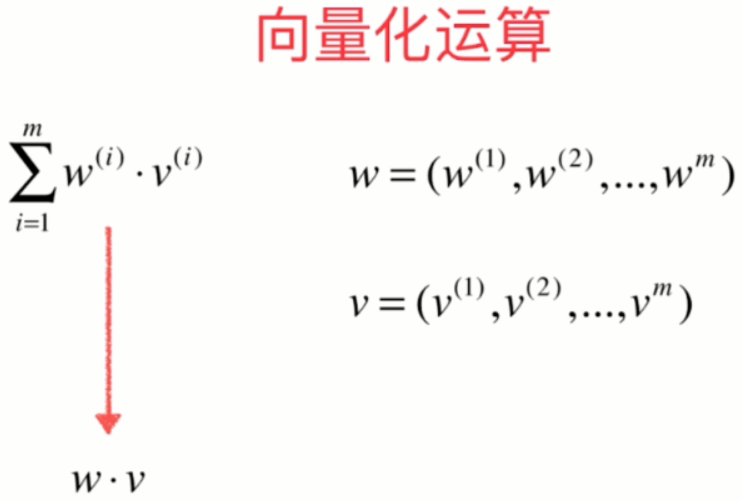

In [27]:
num = (x - x_mean).dot(y - y_mean)
d = (x - x_mean).dot(x - x_mean)
a = num / d
b = y_mean - a * x_mean

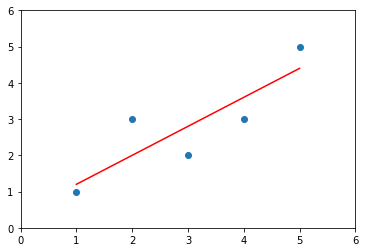

In [28]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

## 三、线性回归算法的评测

### MSE（均方误差）

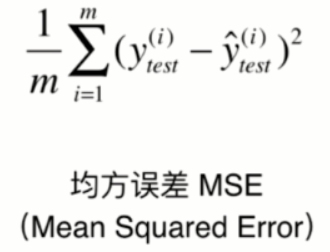
#### 衡量标准和测试样本数无关

### RMSE（均方根误差）

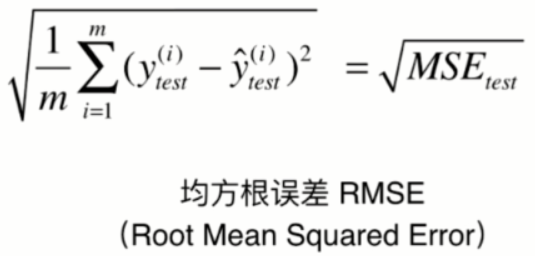
#### 消除量纲对衡量标准的影响

### MAE（平均绝对误差）

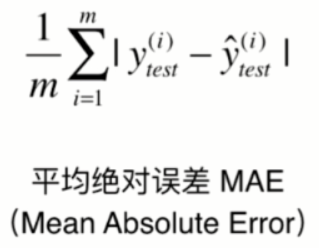
#### 评价一个算法所使用的标准和训练模型（最优化目标函数）可以是不一致的

### 衡量回归算法的标准

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#### 波士顿房产数据

In [32]:
boston = datasets.load_boston()

In [33]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [35]:
x = boston.data[:,5] # 只使用房间数量这个特征

In [36]:
x.shape

(506,)

In [37]:
y = boston.target

In [38]:
y.shape

(506,)

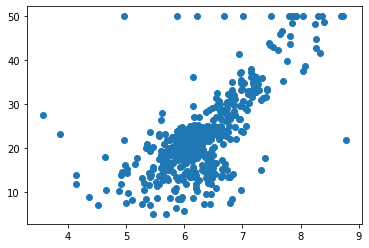

In [39]:
plt.scatter(x, y)
plt.show()

In [40]:
np.max(y)

50.0

In [41]:
x = x[y < 50.0]
y = y[y < 50.0]

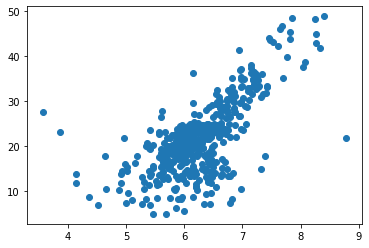

In [42]:
plt.scatter(x, y)
plt.show()

#### 使用简单线性回归法

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [47]:
x_train.shape

(367,)

In [48]:
x_test.shape

(123,)

In [49]:
%run D://资料//程序//Python//Machine_Learn//LinearRegression//simple_linear_regression.py

In [50]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [51]:
reg.a_

8.446607360600366

In [52]:
reg.b_

-30.924518818278056

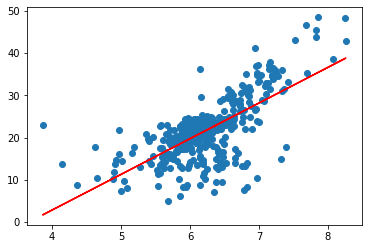

In [53]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [54]:
y_predict = reg.predict(x_test)

#### MSE

In [55]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

43.198145779047074

#### RMSE

In [56]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

6.572529633181357

#### MAE

In [57]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

4.751842369238006

In [58]:
%run D://资料//程序//Python//Machine_Learn//Metrics/metrics.py

In [59]:
mean_squared_error(y_test, y_predict)

43.198145779047074

In [60]:
root_mean_squared_error(y_test, y_predict)

6.572529633181357

In [61]:
mean_absolute_error(y_test, y_predict)

4.751842369238006

#### scikit-learn中的MSE和MAE

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [63]:
mean_squared_error(y_test, y_predict)

43.198145779047074

In [64]:
mean_absolute_error(y_test, y_predict)

4.751842369238006

### R Squared

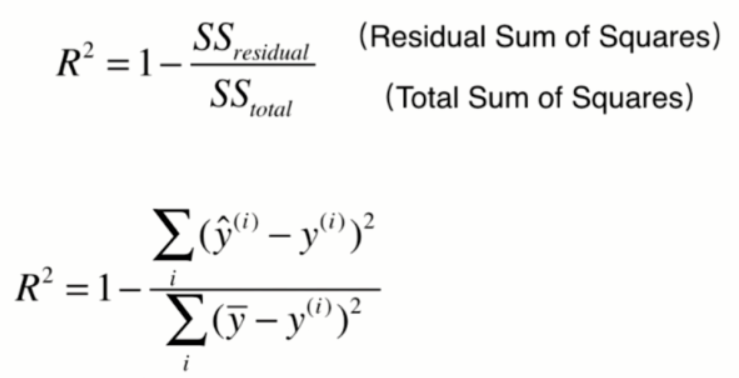

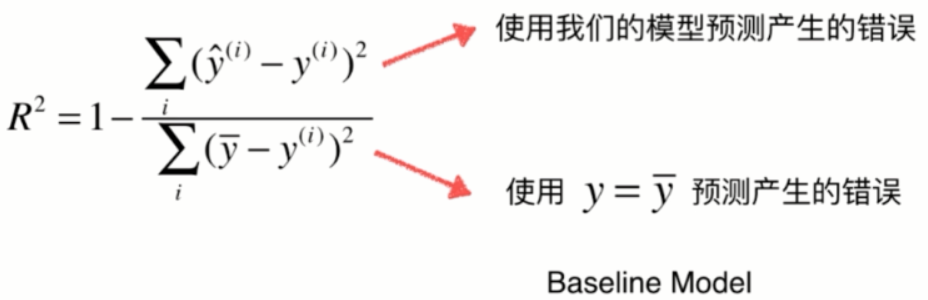

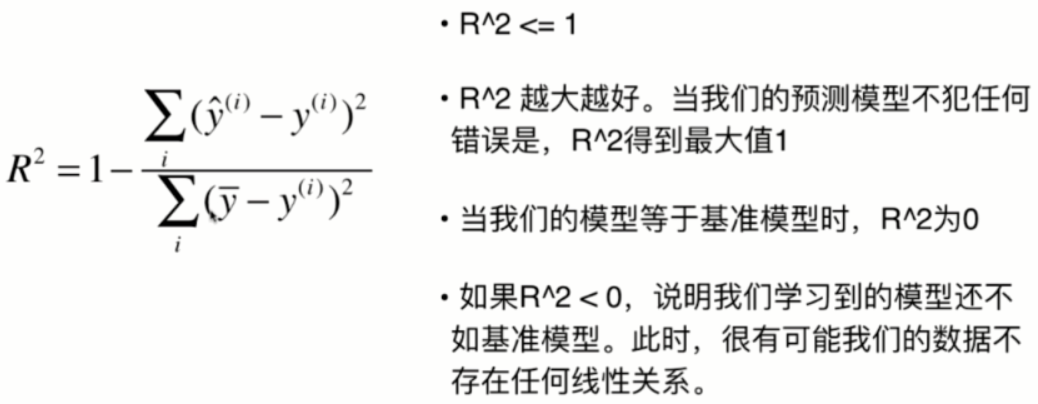

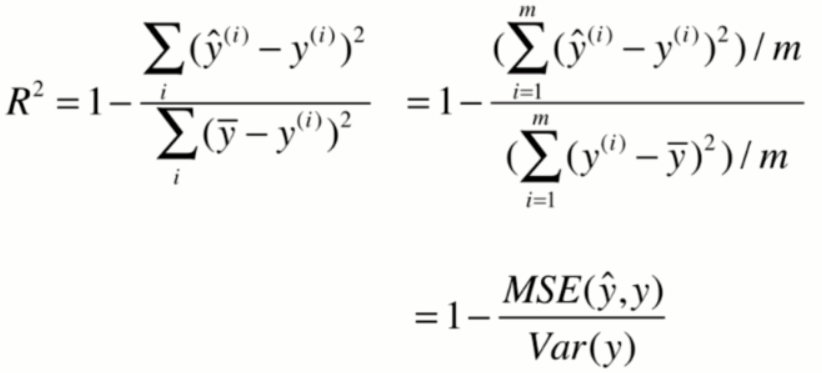

In [65]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.46602492664272843

In [66]:
r2_score(y_test, y_predict)

0.46602492664272843

In [67]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.46602492664272843

In [68]:
reg.score(x_test, y_test)

0.46602492664272843

## 四、多元线性回归

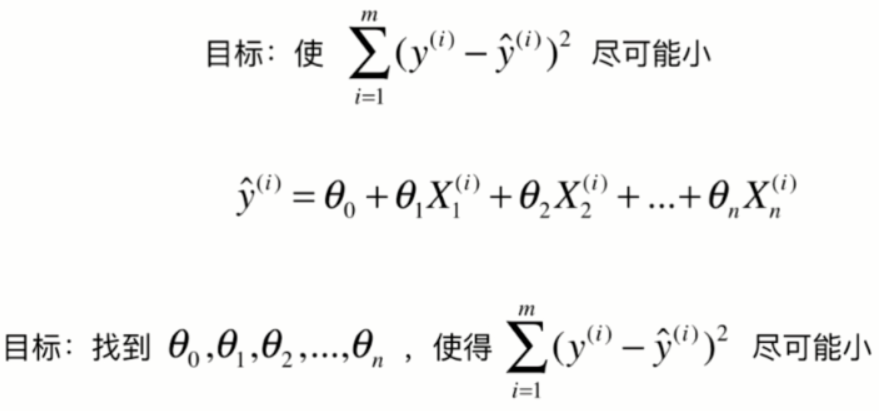

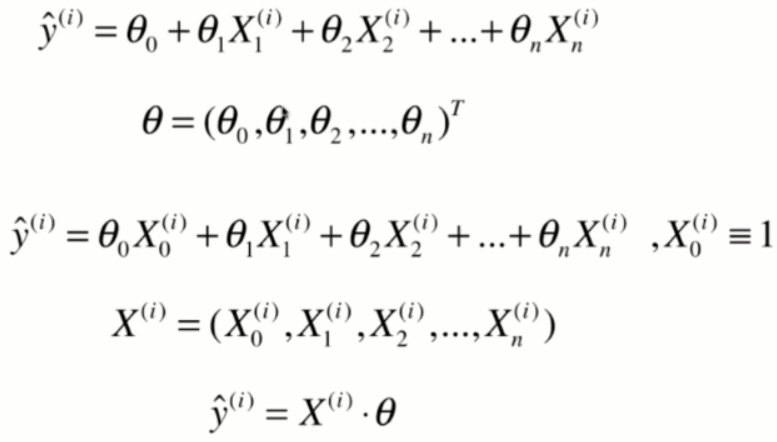

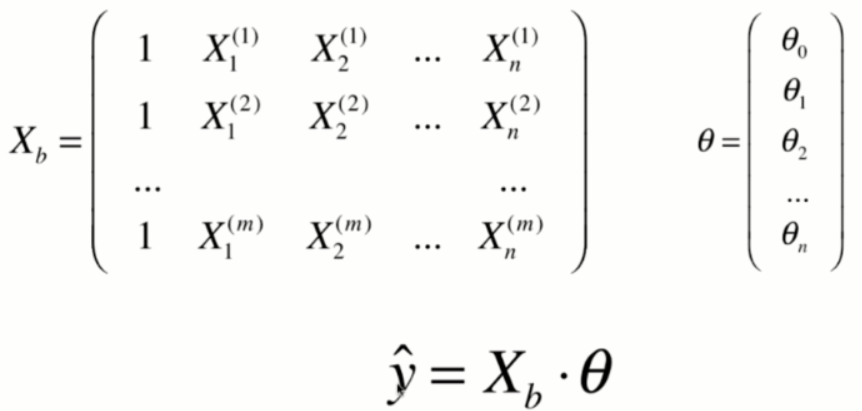

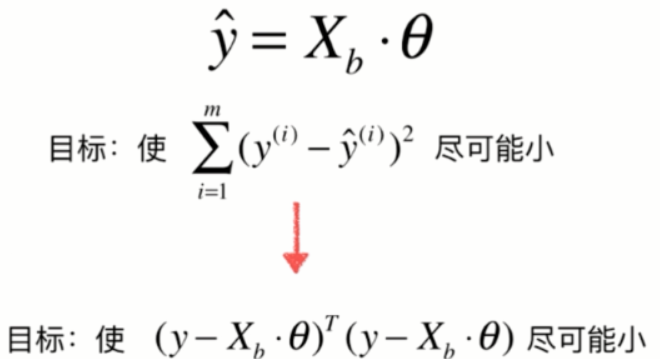

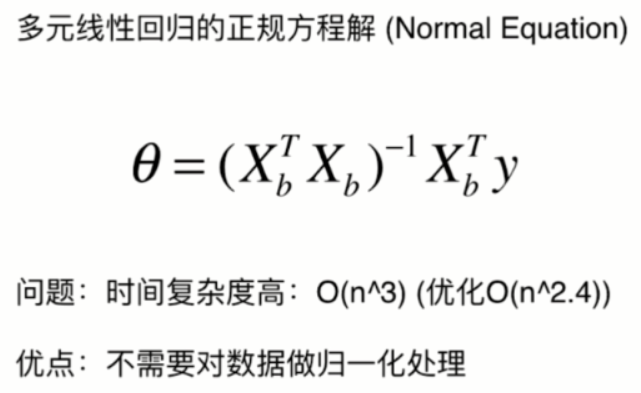

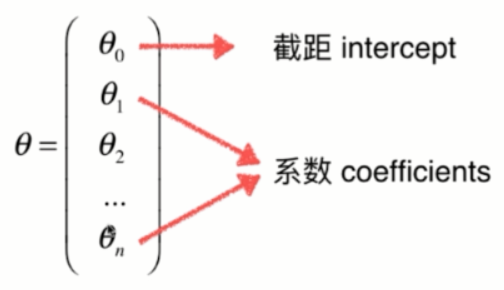

### Linear-Regression的实现

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [4]:
X.shape

(490, 13)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
%run D://资料//程序//Python//Machine_Learn//LinearRegression//linear_regression.py

In [10]:
reg = LinearRegression()
reg.fit_normal(X_train, y_train)

LinearRegression()

In [11]:
reg.coef_

array([-1.15337297e-01,  3.98233116e-02, -4.25817954e-02,  6.12324757e-01,
       -1.45158307e+01,  3.91084989e+00, -2.00973896e-02, -1.23829736e+00,
        2.98965529e-01, -1.59210369e-02, -8.40187143e-01,  8.67481063e-03,
       -3.21025908e-01])

In [12]:
reg.intercept_

32.037336413548594

In [13]:
reg.score(X_test, y_test)

0.757619566757828

### scikit-learn中的线性回归

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [15]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lin_reg.coef_

array([-1.15337297e-01,  3.98233116e-02, -4.25817954e-02,  6.12324757e-01,
       -1.45158307e+01,  3.91084989e+00, -2.00973896e-02, -1.23829736e+00,
        2.98965529e-01, -1.59210369e-02, -8.40187143e-01,  8.67481063e-03,
       -3.21025908e-01])

In [17]:
lin_reg.intercept_

32.03733641356756

In [19]:
lin_reg.score(X_test, y_test)

0.7576195667578185

### kNN Regressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.5317148927670945

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1, 6)]
    }
]

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [22]:
grid_search.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [23]:
grid_search.best_score_

0.6251058394090154

In [25]:
grid_search.best_estimator_.score(X_test, y_test)

0.6844592149321285

### 线性回归的可解释性

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.coef_

array([-1.06715912e-01,  3.53133180e-02, -4.38830943e-02,  4.52209315e-01,
       -1.23981083e+01,  3.75945346e+00, -2.36790549e-02, -1.21096549e+00,
        2.51301879e-01, -1.37774382e-02, -8.38180086e-01,  7.85316354e-03,
       -3.50107918e-01])

In [31]:
np.argsort(lin_reg.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5], dtype=int64)

In [32]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [33]:
boston.feature_names[np.argsort(lin_reg.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

In [34]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

 # 五、总结

### 线性回归算法流程

#### 1、数据集划分（训练数据集、测试数据集）
#### 2、模型训练
#### 3、模型预测（评价指标：R Squared）
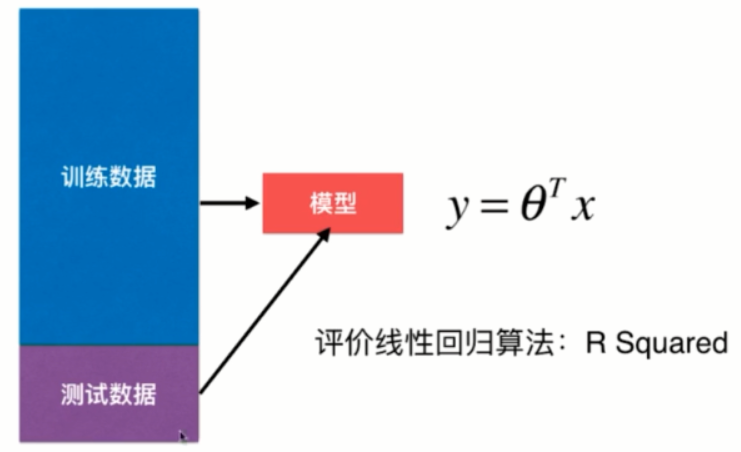

### 线性回归算法总结

#### 1、典型的参数学习算法（对比kNN：非参数学习）
#### 2、只能解决回归问题。虽然很多分类方法中，线性回归是基础（如逻辑回归）
####   （对比kNN：既可以解决分类问题，又可以解决回归问题）
#### 3、对数据存在假设：线性（对比kNN：对数据没有假设）
#### 4、优点：对数据具有强解释性